# Polynomial Linear Regression

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

$$ \text{Data generated based on quadratic formula: } y = ax^2 + bx + c$$

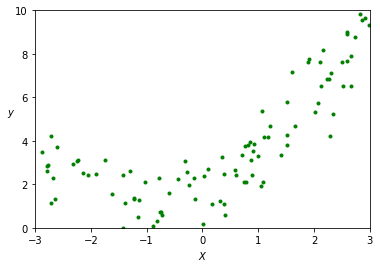

In [11]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X, y, 'g.')
plt.axis([-3, 3, 0, 10])
plt.xlabel('$X$')
plt.ylabel('$y$', rotation=0)

In [32]:
# we add polynomial feature to the second degree

# NOTE: by adding polynomial features means we are able to find relationships between features as we combine features
# to cerate new ones

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([ 1.60975599]), array([ 1.60975599,  2.59131436]))

In [33]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 1.80026049]), array([[ 1.04051428,  0.53395491]]))

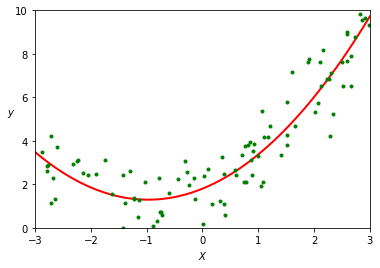

In [34]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, 'g.')
plt.axis([-3, 3, 0, 10])
plt.xlabel('$X$')
plt.ylabel('$y$', rotation=0)

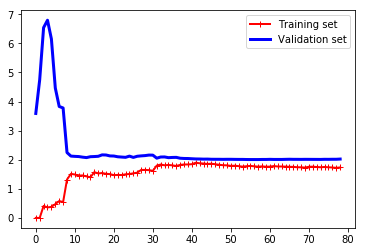

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
    plt.legend()


lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

# The error is fairly high and plateaus quickly, a sign of underfit

[0, 80, 0, 3]

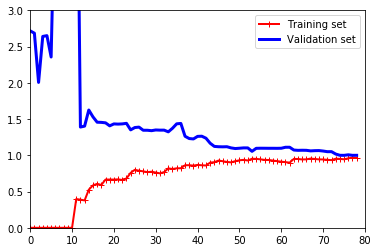

In [51]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_feature', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3]) 

# the error on the training data is much lower
# gap between both curves, training performs better - a hallmark of overfit